In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [41]:
data = pd.read_csv('Car Price Details.csv')

In [42]:
data.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [43]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [44]:
data.shape

(4340, 8)

In [45]:
print(data.fuel.value_counts())

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64


In [46]:
print(data.seller_type.value_counts())

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64


In [47]:
print(data.owner.value_counts())

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64


In [48]:
print(data.transmission.value_counts())

Manual       3892
Automatic     448
Name: transmission, dtype: int64


In [49]:
data.replace({'fuel': {'Petrol':0, 'Diesel':1, 'CNG': 2, 'LPG':3, 'Electric':4}},
inplace = True)
data.replace({'seller_type': {'Individual':0, 'Dealer':1, 'Trustmark Dealer': 2}},
inplace = True)
data.replace({'owner': {'First Owner':0, 'Second Owner':1, 'Third Owner': 2, 'Fourth & Above Owner':3, 'Test Drive Car':4}},
inplace = True)
data.replace({'transmission': {'Manual':0, 'Automatic':1}},
inplace = True)

In [50]:
data.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,1
5,Maruti Alto LX BSIII,2007,140000,125000,0,0,0,0
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,0,0,0,0
7,Tata Indigo Grand Petrol,2014,240000,60000,0,0,0,1
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,0,0,0,0
9,Maruti Celerio Green VXI,2017,365000,78000,2,0,0,0


In [51]:
X=data.drop(['name','selling_price'], axis=1)
Y=data['selling_price']

In [52]:
print(X)
print(Y)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     0            0             0      0
1     2007      50000     0            0             0      0
2     2012     100000     1            0             0      0
3     2017      46000     0            0             0      0
4     2014     141000     1            0             0      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     1            0             0      1
4336  2014      80000     1            0             0      1
4337  2009      83000     0            0             0      1
4338  2016      90000     1            0             0      0
4339  2016      40000     0            0             0      0

[4340 rows x 6 columns]
0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=2)

In [54]:
lin_reg_model=LinearRegression()

In [55]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [56]:
training_data_prediction = lin_reg_model.predict(X_train)

In [57]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.43256302275062364


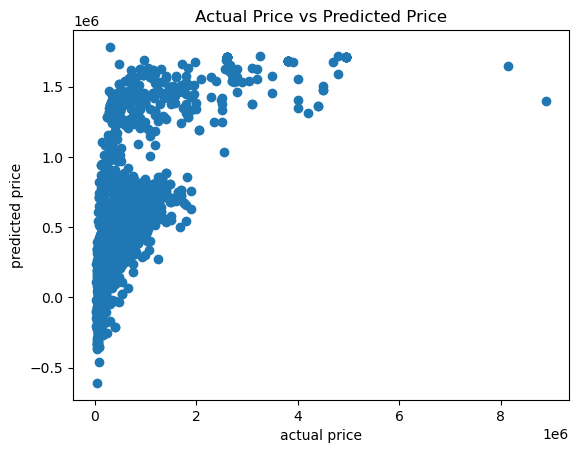

In [58]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [59]:
test_data_prediction = lin_reg_model.predict(X_test)

In [60]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.5123159688209227


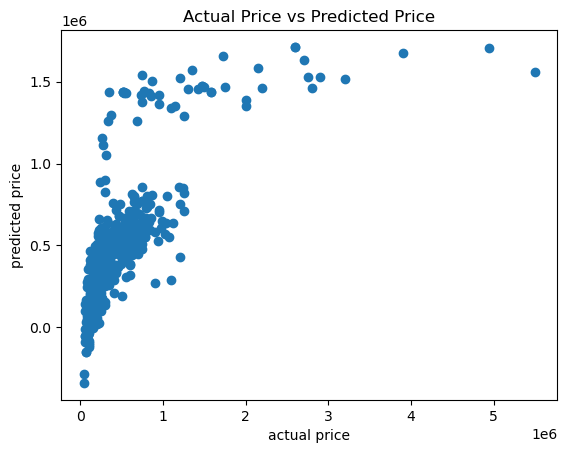

In [61]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [62]:
lasso_reg_model = Lasso()

In [63]:
lasso_reg_model.fit(X_train,Y_train)

Lasso()

In [64]:
training_lasso_data_prediction = lasso_reg_model.predict(X_train)

In [65]:
error_score = metrics.r2_score(Y_train, training_lasso_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.4325630226975419


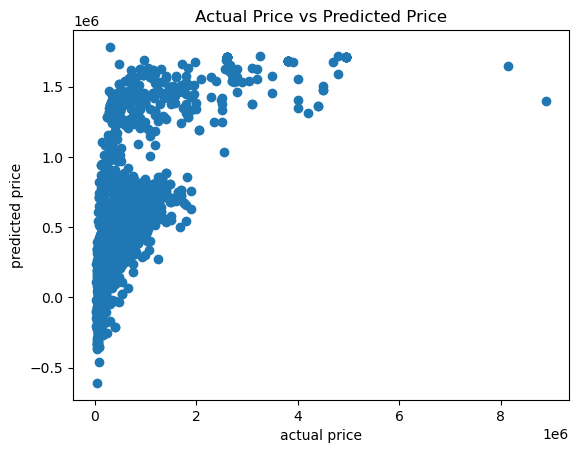

In [66]:
plt.scatter(Y_train, training_lasso_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [74]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
model = RandomForestRegressor()
model.fit(X_train,Y_train)

RandomForestRegressor()

In [82]:
Y_pred = model.predict(X_train)

error_score2 = metrics.r2_score(Y_train, Y_pred)

print("R squared error: ", error_score2)

R squared error:  0.9152021542534611


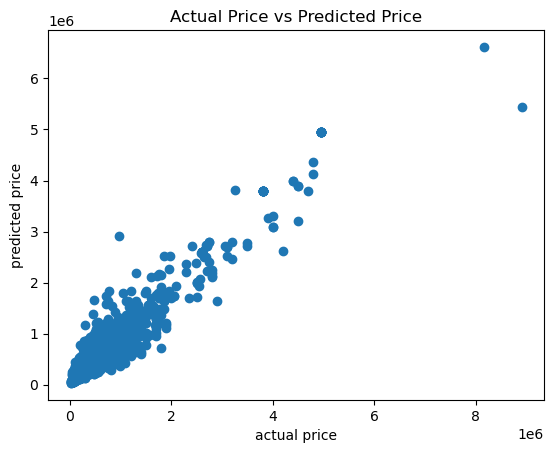

In [83]:
plt.scatter(Y_train, Y_pred)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("Actual Price vs Predicted Price")
plt.show()